# Liver Cirrhosis

🎯 Objectives of the dataset
The dataset is designed to help build models that can:
- Classify patients into the correct cirrhosis stage based on their clinical data.
- Assist doctors in early detection and monitoring of disease progression.
- Identify important predictors (which lab values or symptoms most strongly indicate disease severity).
- Support decision-making for treatment planning and prognosis.
So the main ML objective is classification: predicting the categorical target stage


- Clean → Explore → Engineer → Train classifiers → Evaluate → Deploy.
- Impact: Helps in medical decision support, prognosis, and identifying key risk factors.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
Liver = pd.read_csv(r"dataset\Liver Cirrhosis Stage Data.csv")

In [3]:
display(Liver.shape)

(25000, 19)

In [4]:
display(Liver.columns)

Index(['N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly',
       'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage'],
      dtype='object')

In [5]:
display(Liver.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         25000 non-null  int64  
 1   Status         25000 non-null  object 
 2   Drug           25000 non-null  object 
 3   Age            25000 non-null  int64  
 4   Sex            25000 non-null  object 
 5   Ascites        25000 non-null  object 
 6   Hepatomegaly   25000 non-null  object 
 7   Spiders        25000 non-null  object 
 8   Edema          25000 non-null  object 
 9   Bilirubin      25000 non-null  float64
 10  Cholesterol    25000 non-null  float64
 11  Albumin        25000 non-null  float64
 12  Copper         25000 non-null  float64
 13  Alk_Phos       25000 non-null  float64
 14  SGOT           25000 non-null  float64
 15  Tryglicerides  25000 non-null  float64
 16  Platelets      25000 non-null  float64
 17  Prothrombin    25000 non-null  float64
 18  Stage 

None

In [6]:
Describe = Liver.describe() 
Describe

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.00000
mean,1887.117040,18495.877080,3.402644,372.331471,3.486578,100.184663,1995.675597,123.166345,123.822548,256.007337,10.734549,2.00116
std,1091.690918,3737.596616,4.707491,193.668452,0.380488,73.184840,1798.885660,47.747616,52.786350,98.679006,0.904436,0.81387
min,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.00000
25%,1080.000000,15694.000000,0.800000,275.000000,3.290000,52.000000,1032.000000,92.000000,92.000000,189.000000,10.000000,1.00000
50%,1680.000000,18499.000000,1.300000,369.510563,3.510000,97.648387,1828.000000,122.556346,124.702128,251.000000,10.600000,2.00000
75%,2576.000000,20955.000000,3.400000,369.510563,3.750000,107.000000,1982.655769,134.850000,127.000000,311.000000,11.100000,3.00000
max,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,3.00000


In [7]:
TOP_FIVE_ROWS = Liver.head(5)
TOP_FIVE_ROWS

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2221,C,Placebo,18499,F,N,Y,N,N,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9,1
1,1230,C,Placebo,19724,M,Y,N,Y,N,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8,2
2,4184,C,Placebo,11839,F,N,N,N,N,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,2
3,2090,D,Placebo,16467,F,N,N,N,N,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2,2
4,2105,D,Placebo,21699,F,N,Y,N,N,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5,1


Text(0.5, 1.0, 'Status vs stage')

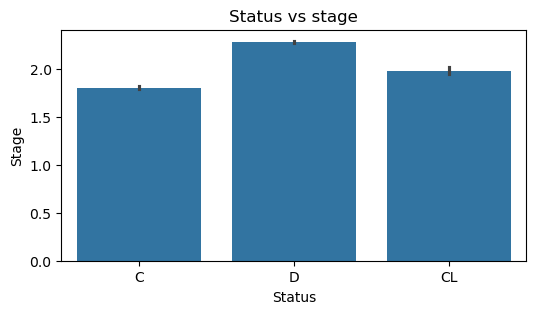

In [8]:
plt.figure(figsize =(6,3))
sns.barplot(x="Status",y="Stage",data=Liver)
plt.title("Status vs stage")

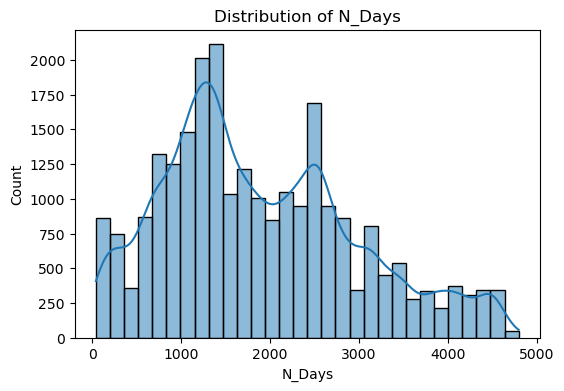

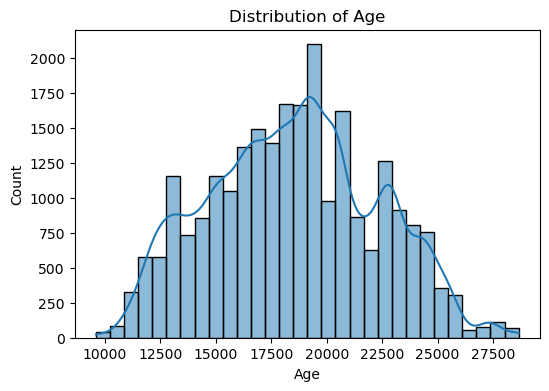

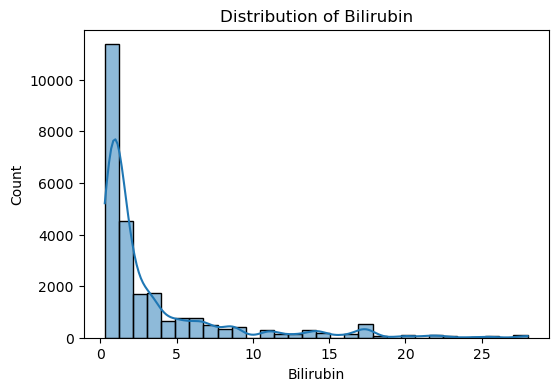

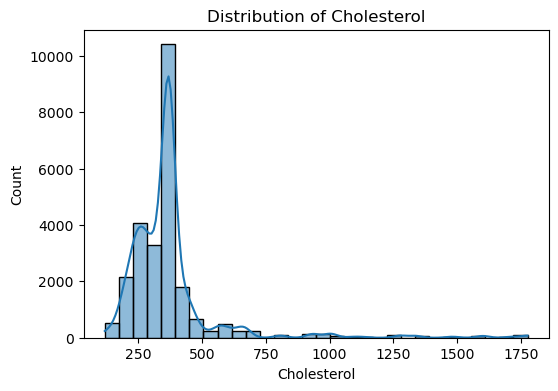

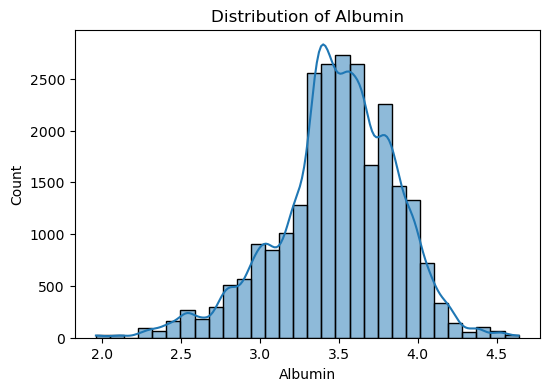

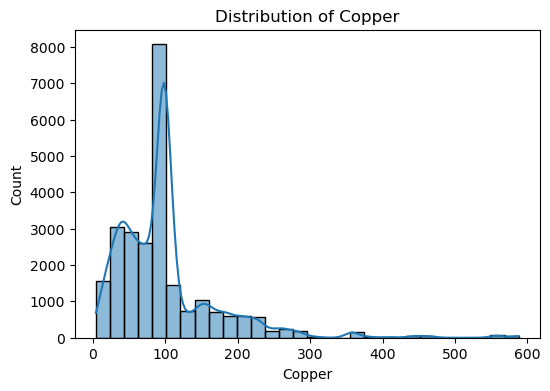

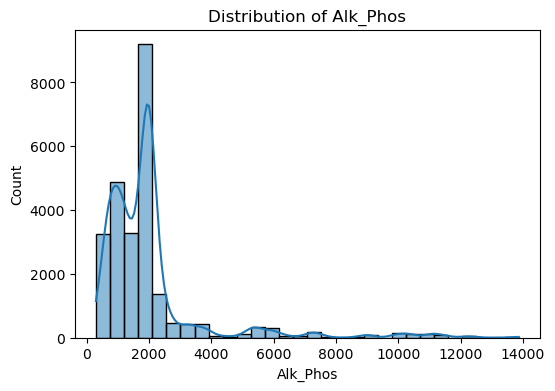

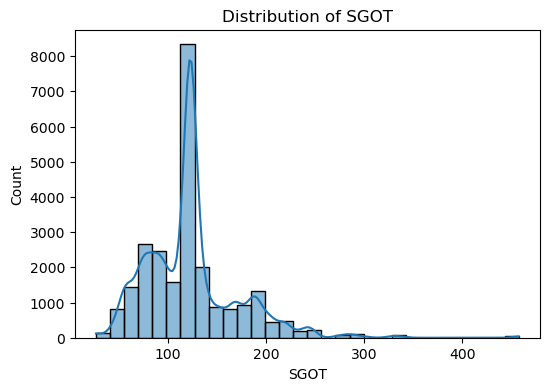

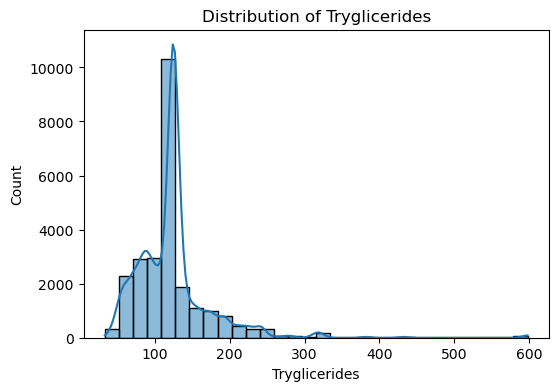

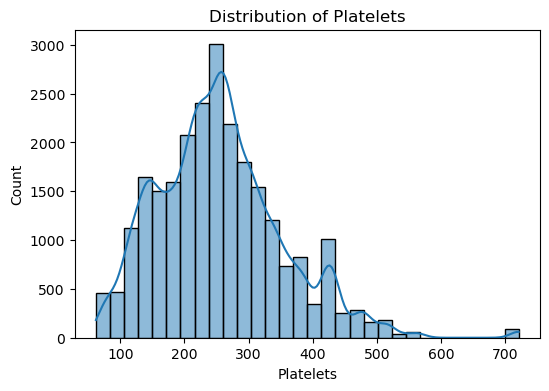

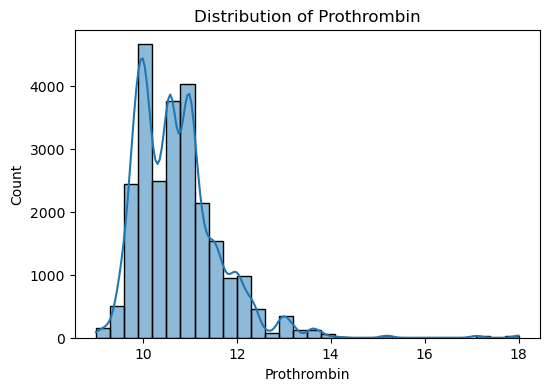

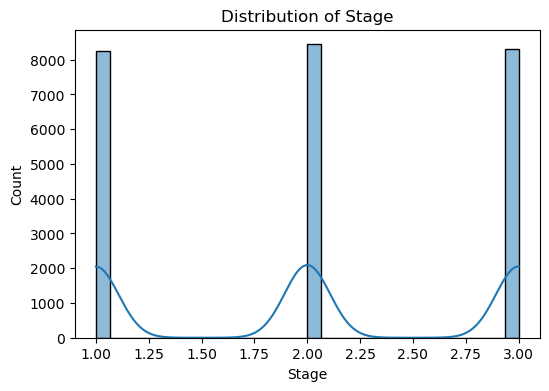

In [9]:
for col in Liver.select_dtypes(include=np.number).columns:
    plt.figure(figsize=(6,4))
    sns.histplot(Liver[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")

In [10]:
X = Liver.drop('Stage', axis=1)
y = Liver['Stage'] 

In [11]:
feature_num = X.select_dtypes(include=["int64", "float64"]).columns
feature_cat = X.select_dtypes(include=["object", "category"]).columns

In [12]:
Liver["Stage"].unique()

array([1, 2, 3])

In [13]:
#pip install scikit-learn

In [14]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size = 0.2,random_state =42)

# Model Buliding 

In [15]:
# pip install XGBoost

In [16]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,
                             roc_auc_score)
from sklearn.metrics import RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer

In [17]:
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", num_pipeline, feature_num),
    ("cat", cat_pipeline, feature_cat)
])

In [18]:
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "RandomForest": RandomForestClassifier(n_estimators=200, random_state=42),
    "GradientBoosting": GradientBoostingClassifier(random_state=42),
    "SVC": SVC(probability=True, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
}


Evaluate Baseline models

In [19]:
baseline_results = {}
for name, model in models.items():
    model = Pipeline(steps=[
            ("preprocessor", preprocessor),
            ("classifier", model)])
    model.fit(x_train, y_train)
    preds = model.predict(x_test)
    acc = accuracy_score(y_test, preds)
    baseline_results[name] = acc
    print(f"{name}: {acc:.4f}")

best_name = max(baseline_results, key=baseline_results.get)
best_baseline_acc = baseline_results[best_name]
print(f"Best baseline: {best_name} ({best_baseline_acc:.4f})")


LogisticRegression: 0.5994
RandomForest: 0.9568
GradientBoosting: 0.8622
SVC: 0.8254
KNN: 0.8954
DecisionTree: 0.9174
Best baseline: RandomForest (0.9568)


# Hyperparameter tuning for best model

In [20]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [21]:
RF_pip = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(random_state=42))
])


In [22]:
RF_params = {
    "classifier__n_estimators": [200,300],
    "classifier__max_depth": [10, 20, None],
    "classifier__min_samples_split": [2, 5],
    "classifier__min_samples_leaf": [1, 2],
    "classifier__max_features": ["log2", "sqrt", 0.5]
}


In [23]:
RF_grid = GridSearchCV(
    RF_pip,RF_params, cv=5, scoring="accuracy", n_jobs=-1,verbose=1
)

In [24]:
RF_grid.fit(x_train, y_train)
print("Best Random Forest Params:", RF_grid.best_params_)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Random Forest Params: {'classifier__max_depth': None, 'classifier__max_features': 0.5, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}


In [25]:
SVM_pip = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", SVC(probability=True, random_state=42))
])


In [29]:
SVM_param ={
    "classifier__C":[0.5,1,2],
    "classifier__kernel":["rbf","linear"],
    "classifier__gamma":["scale","auto"]
}

In [30]:
SVM_grid = GridSearchCV(
    SVM_pip,
    SVM_param,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)


In [31]:
SVM_grid.fit(x_train,y_train)
print("Best SVM params :",SVM_grid.best_params_)

Best SVM params : {'classifier__C': 2, 'classifier__gamma': 'scale', 'classifier__kernel': 'rbf'}


In [32]:
KNN_pip = Pipeline(steps = [
    ("preprocessor",preprocessor),
    ("classifier",KNeighborsClassifier())
])

In [33]:
KNN_param = {
    "classifier__n_neighbors":[3,5,7],
    "classifier__weights":["uniform","distance"],
    "classifier__p":[1,2]
}

In [36]:
KNN_grid = GridSearchCV(
    KNN_pip,KNN_param,cv=cv,scoring="accuracy",n_jobs=-1,verbose=1
)

In [37]:
KNN_grid.fit(x_train,y_train)
print("Best KNN params :",KNN_grid.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best KNN params : {'classifier__n_neighbors': 5, 'classifier__p': 1, 'classifier__weights': 'distance'}


In [38]:
LR = Pipeline(steps=[
    ("preprocessor",preprocessor),
    ("classifier",LogisticRegression(max_iter=1000, random_state=42))

])

In [39]:
LR_param = {
        "classifier__C": [0.5, 1, 2, 5, 10],
        "classifier__penalty": ["l2"]
    }

In [40]:
LR_grid = GridSearchCV(
    LR,LR_param,cv=cv,scoring="accuracy",n_jobs=-1,verbose=1
                       )

In [41]:
LR_grid.fit(x_train,y_train)
print("Best param Logistic Regression:",LR_grid.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best param Logistic Regression: {'classifier__C': 1, 'classifier__penalty': 'l2'}


In [42]:
GB_pip = Pipeline(steps=[
    ("preprocessor",preprocessor),
    ("classifier",GradientBoostingClassifier(random_state=42))
])

In [43]:
GB_param = {
        "classifier__n_estimators": [200, 400, 600],
        "classifier__learning_rate": [0.05, 0.1],
        "classifier__max_depth": [2, 3]
    }

In [44]:
GB_grid = GridSearchCV(
    GB_pip,GB_param,cv=cv,scoring="accuracy",n_jobs=-1,verbose=1
)

In [45]:
GB_grid.fit(x_train,y_train)
print("Best param GradientBoostingClassifier:",GB_grid.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best param GradientBoostingClassifier: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 600}


# Model Evaluation

In [49]:
Best_model = {
    "LogisticRegression":LR_grid.best_estimator_,
    "RandomForest":RF_grid.best_estimator_,
    "GradientBoosting":GB_grid.best_estimator_,
    "Support vector classifier":SVM_grid.best_estimator_,
    "KNeighbors":KNN_grid.best_estimator_
    
}

In [50]:
Final_results = {}

for name, model in Best_model.items():
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    
    
    Final_results[name] = {
        "Final Train_Accuracy": accuracy_score(y_train, y_pred_train),
        "Final Test_Accuracy": accuracy_score(y_test, y_pred_test)
    }


for name, scores in Final_results.items():
    display(f"{name}: Train={scores['Final Train_Accuracy']:.4f}, Test={scores['Final Test_Accuracy']:.4f}")

'LogisticRegression: Train=0.5914, Test=0.5994'

'RandomForest: Train=0.9940, Test=0.9580'

'GradientBoosting: Train=0.9694, Test=0.9566'

'Support vector classifier: Train=0.8669, Test=0.8472'

'KNeighbors: Train=0.9939, Test=0.9352'

# Model Deployment

In [52]:
import joblib

Best_model= RF_grid.best_estimator_
joblib.dump(Best_model, 'Liver_disease_model.pkl')
joblib.dump(preprocessor, 'scaler.pkl')

['scaler.pkl']